In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

from Group2_Project1_DataCleaning import midwest_homicide_df, midwest_solved_group, \
chicago, indy, mpls, midwest_total_group, count_offender_gender, count_gender, \
victim_race, offender_race, female_percent, male_percent, female_df, male_df, weapon_type, \
slvd_impact, pres_df, murders_by_year_df, pres_mby_df, order_presTerms_murder_df, \
mrdr_party_t_df, r_mrdr_party_t_df

/Users/amberbillings/Desktop/Final Files/Group2_Project1_DataCleaning.py:224: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  "Poison - does not include gas": "No/Little Contact"})
/Users/amberbillings/Desktop/Final Files/Group2_Project1_DataCleaning.py:251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  "In-law" : 'Other - known to victim'})
/Users/amberbillings/Desktop/Final Files/Group2_Project1_DataCleaning.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

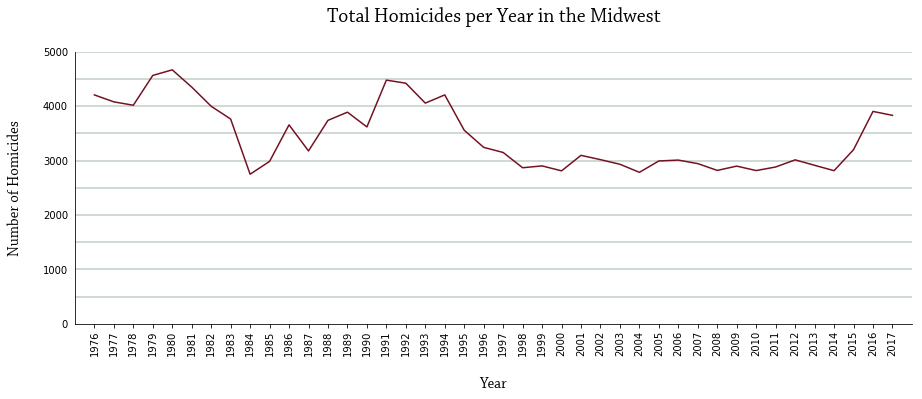

In [2]:
fig, ax = plt.subplots(figsize=(15,5))

plt.plot(midwest_total_group["Year"], midwest_total_group["ID"], color='#721121')

ax.set_title('Total Homicides per Year in the Midwest', fontname='Chaparral Pro', loc='center', pad=30, fontsize=20)
ax.set_xlabel('Year', labelpad=20, fontname='Chaparral Pro', fontsize=15)
ax.set_ylabel('Number of Homicides', labelpad=20, fontname='Chaparral Pro', fontsize=15)
 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tick_params(
    axis='y',
    left=False)

ax.hlines(500, 1975, 2018, color='#c1cdc6')
ax.hlines(1000, 1975, 2018, color='#c1cdc6')
ax.hlines(1500, 1975, 2018, color='#c1cdc6')
ax.hlines(2000, 1975, 2018, color='#c1cdc6')
ax.hlines(2500, 1975, 2018, color='#c1cdc6')
ax.hlines(3000, 1975, 2018, color='#c1cdc6')
ax.hlines(3500, 1975, 2018, color='#c1cdc6')
ax.hlines(4000, 1975, 2018, color='#c1cdc6')
ax.hlines(4500, 1975, 2018, color='#c1cdc6')
ax.hlines(5000, 1975, 2018, color='#c1cdc6')


plt.xlim(1975, 2018)
plt.ylim(0, 5000)

plt.xticks(np.arange(1976, 2018, step=1), rotation=90)

plt.savefig("images/midwest_homicides_per_year.png", dpi=300, bbox_inches="tight", pad_inches=0.25)

plt.show()

## Victim/Offender Demographics

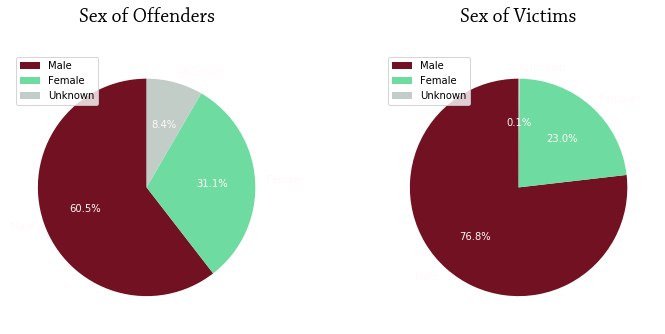

In [3]:
colors = ['#721121', '#6EDBA1', '#c1cdc6']
labels = ['Male', 'Female', 'Unknown']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax1.pie(count_offender_gender, colors=colors, labels=labels, radius = 1,
        autopct="%1.1f%%", startangle=90, textprops=dict(color="snow"))

ax2.pie(count_gender, colors=colors, labels=labels, radius = 1,
        autopct="%1.1f%%", startangle=90, textprops=dict(color="snow"))

plt.subplots_adjust(wspace=-.2)

ax1.legend(loc='upper left')
ax2.legend(loc='upper left')


ax1.set_title('Sex of Offenders', fontname='Chaparral Pro', loc='center', pad=30, fontsize=20)
ax2.set_title('Sex of Victims', fontname='Chaparral Pro', loc='center', pad=30, fontsize=20)

plt.savefig("images/offender_victim_sex.png", dpi=300, bbox_inches="tight", pad_inches=0.25)

plt.show()

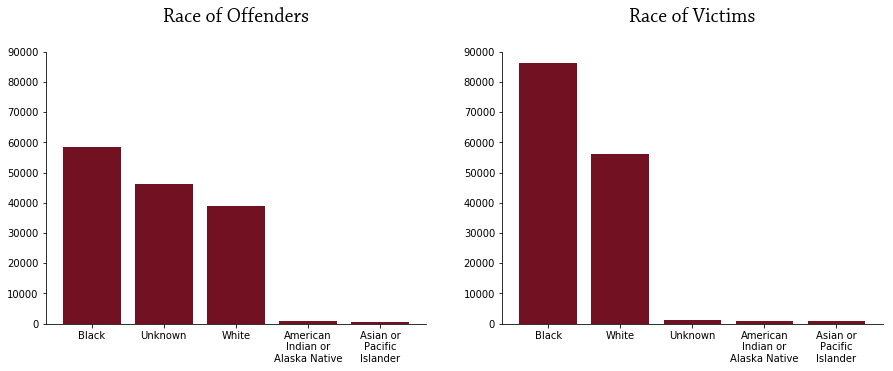

In [4]:
race_labels = ['Black', 'White', 'Unknown', 'American\nIndian or\nAlaska Native',
               'Asian or\nPacific\nIslander']

offrace_labels = ['Black', 'Unknown', 'White', 'American\nIndian or\nAlaska Native',
               'Asian or\nPacific\nIslander']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax1.bar(offrace_labels, offender_race,color='#721121', align="center")

ax2.bar(race_labels, victim_race, color='#721121', align="center")

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

ax1.set_ylim([0, 90000])
ax2.set_ylim([0, 90000])

plt.subplots_adjust(wspace=0.2)

ax1.set_title('Race of Offenders', fontname='Chaparral Pro', loc='center', pad=30, fontsize=20)
ax2.set_title('Race of Victims', fontname='Chaparral Pro', loc='center', pad=30, fontsize=20)

plt.savefig("images/offender_victim_race.png", dpi=300, bbox_inches="tight", pad_inches=0.25)

plt.show()

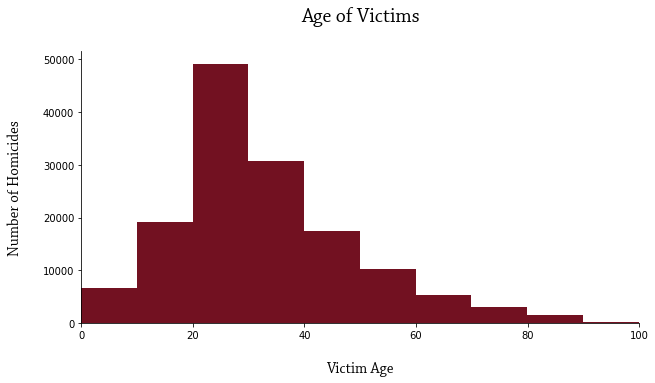

In [5]:
fig, ax = plt.subplots(figsize=(10,5))

plt.hist(midwest_homicide_df['VicAge'], bins=100, color='#721121')

ax.set_title('Age of Victims', fontname='Chaparral Pro', loc='center', pad=30, fontsize=20)
ax.set_xlabel('Victim Age', labelpad=20, fontname='Chaparral Pro', fontsize=15)
ax.set_ylabel('Number of Homicides', labelpad=20, fontname='Chaparral Pro', fontsize=15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlim(0,100)

plt.savefig("images/victim_age.png", dpi=300, bbox_inches="tight", pad_inches=0.25)

plt.show()

## Victim/Offender Relationships

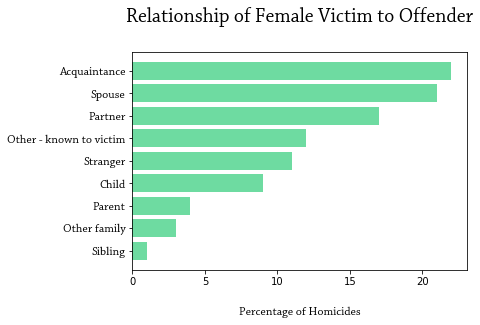

In [6]:
#Plot Female Victim Relationship Information
y_axis = np.arange(len(female_percent))
tick_locations = [value for value in y_axis]

#plt.figure(figsize=(20,3))
plt.barh(y_axis, female_percent, color= '#6EDBA1', alpha= 1.0, align="center")
plt.yticks(tick_locations, female_df["Relationship"], fontname='Chaparral Pro', 
           fontsize=12, rotation="horizontal")

# Set a Title and labels
plt.title("Relationship of Female Victim to Offender", pad=30, fontname='Chaparral Pro', fontsize=20)
plt.xlabel("Percentage of Homicides", labelpad=20, fontname='Chaparral Pro', fontsize=12)

plt.savefig("images/relationship_f.png", dpi=300, bbox_inches="tight", pad_inches=0.25)

plt.show()

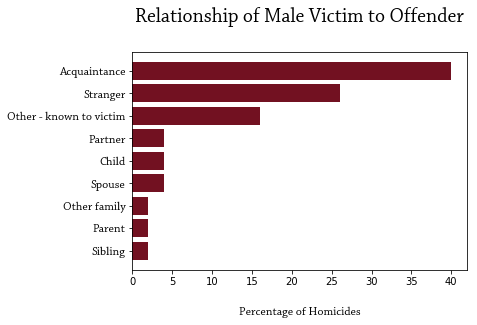

In [7]:
#Plot Male Victim Relationship Information
y_axis = np.arange(len(male_percent))
tick_locations = [value for value in y_axis]

#plt.figure(figsize=(20,3))
plt.barh(y_axis, male_percent, color='#721121', alpha= 1.0, align="center")
plt.yticks(tick_locations, male_df["Relationship"], fontname='Chaparral Pro', 
           fontsize=12, rotation="horizontal")

# Set a Title and labels
plt.title("Relationship of Male Victim to Offender", fontname='Chaparral Pro', pad=30, fontsize=20)
plt.xlabel("Percentage of Homicides", labelpad=20, fontname='Chaparral Pro', fontsize=12)

plt.savefig("images/relationship_m.png", dpi=300, bbox_inches="tight", pad_inches=0.25)

plt.show()

## Comparing victim/offender relationships and weapon types

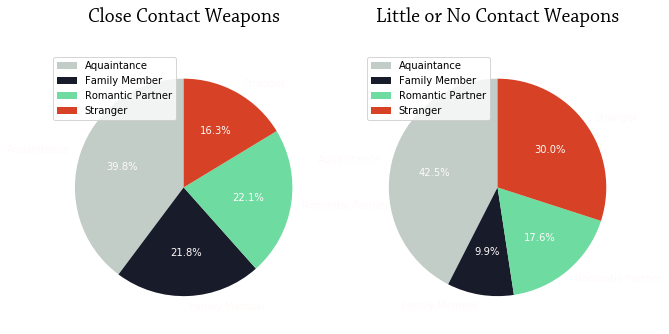

In [8]:
cc_relationship = ['Aquaintance', 'Family Member', 'Romantic Partner', 'Stranger']
cc_count = [8835, 4844, 4909, 3628]
colors = ["#C1CDC6", "#171B2A", "#6edba1", "#D74125"]

lc_relationship = ['Aquaintance', 'Family Member', 'Romantic Partner', 'Stranger']
lc_count = [20943, 4881, 8679, 14774]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax1.pie(cc_count, labels=cc_relationship, colors=colors,
        autopct="%1.1f%%", startangle=90, textprops=dict(color="snow"))

ax2.pie(lc_count, labels=lc_relationship, colors=colors,
        autopct="%1.1f%%", startangle=90, textprops=dict(color="snow"))

plt.subplots_adjust(wspace=-0.4)
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')

ax1.set_title('Close Contact Weapons', fontname='Chaparral Pro', loc='center', pad=30, fontsize=20)
ax2.set_title('Little or No Contact Weapons', fontname='Chaparral Pro', loc='center', pad=30, fontsize=20)

plt.savefig("images/relationship_weapons.png", dpi=300, bbox_inches="tight", pad_inches=0.25)

plt.show()

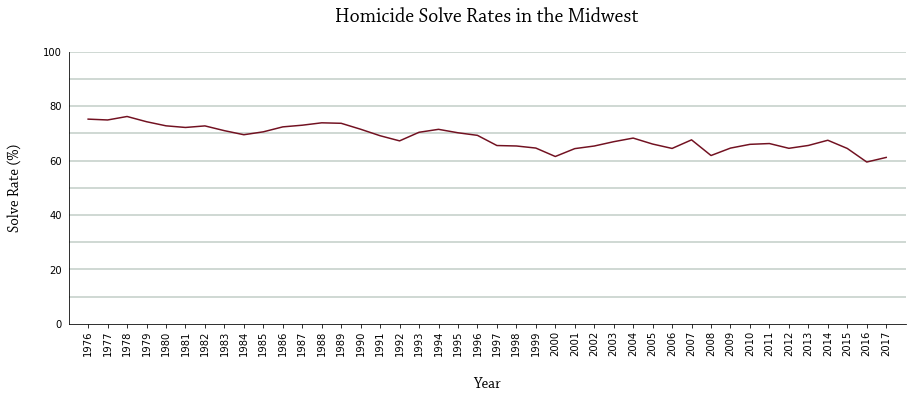

In [9]:
year = midwest_solved_group["Year"]
solved = midwest_solved_group["% Solved"]

fig, ax = plt.subplots(figsize=(15,5))

plt.plot(year, solved, color='#721121')

ax.set_title('Homicide Solve Rates in the Midwest', fontname='Chaparral Pro', loc='center', pad=30, fontsize=20)
ax.set_xlabel('Year', labelpad=20, fontname='Chaparral Pro', fontsize=15)
ax.set_ylabel('Solve Rate (%)', labelpad=20, fontname='Chaparral Pro', fontsize=15)
 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tick_params(
    axis='y',
    left=False)

ax.hlines(10, 1975, 2018, color='#c1cdc6')
ax.hlines(20, 1975, 2018, color='#c1cdc6')
ax.hlines(30, 1975, 2018, color='#c1cdc6')
ax.hlines(40, 1975, 2018, color='#c1cdc6')
ax.hlines(50, 1975, 2018, color='#c1cdc6')
ax.hlines(60, 1975, 2018, color='#c1cdc6')
ax.hlines(70, 1975, 2018, color='#c1cdc6')
ax.hlines(80, 1975, 2018, color='#c1cdc6')
ax.hlines(90, 1975, 2018, color='#c1cdc6')
ax.hlines(100, 1975, 2018, color='#c1cdc6')

plt.xlim(1975, 2018)
plt.ylim(0, 100)

plt.xticks(np.arange(1976, 2018, step=1), rotation=90)

plt.savefig("images/solve_rates.png", dpi=300, bbox_inches="tight", pad_inches=0.25)

plt.show()

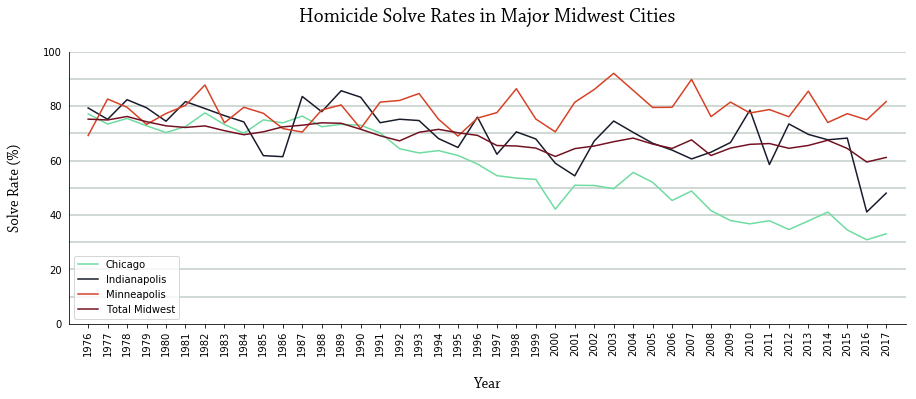

In [10]:
fig, ax = plt.subplots(figsize=(15,5))

plt.plot(chicago["Year"], chicago["% Solved"], color='#6EDBA1', label="Chicago")
plt.plot(indy["Year"], indy["% Solved"], color='#171B2A', label="Indianapolis")
plt.plot(mpls["Year"], mpls["% Solved"], color='#D74125', label="Minneapolis")
plt.plot(year, solved, color='#721121', label = "Total Midwest")

ax.set_title('Homicide Solve Rates in Major Midwest Cities', fontname='Chaparral Pro', loc='center', 
             pad=30, fontsize=20)
ax.set_xlabel('Year', labelpad=20, fontname='Chaparral Pro', fontsize=15)
ax.set_ylabel('Solve Rate (%)', labelpad=20, fontname='Chaparral Pro', fontsize=15)
 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tick_params(
    axis='y',
    left=False)

ax.hlines(10, 1975, 2018, color='#c1cdc6')
ax.hlines(20, 1975, 2018, color='#c1cdc6')
ax.hlines(30, 1975, 2018, color='#c1cdc6')
ax.hlines(40, 1975, 2018, color='#c1cdc6')
ax.hlines(50, 1975, 2018, color='#c1cdc6')
ax.hlines(60, 1975, 2018, color='#c1cdc6')
ax.hlines(70, 1975, 2018, color='#c1cdc6')
ax.hlines(80, 1975, 2018, color='#c1cdc6')
ax.hlines(90, 1975, 2018, color='#c1cdc6')
ax.hlines(100, 1975, 2018, color='#c1cdc6')

plt.xlim(1975, 2018)
plt.ylim(0, 100)

plt.legend()

plt.xticks(np.arange(1976, 2018, step=1), rotation=90)

plt.savefig("images/solve_rates_cities.png", dpi=300, bbox_inches="tight", pad_inches=0.25)

plt.show()

## Comparing murder data with presidential terms

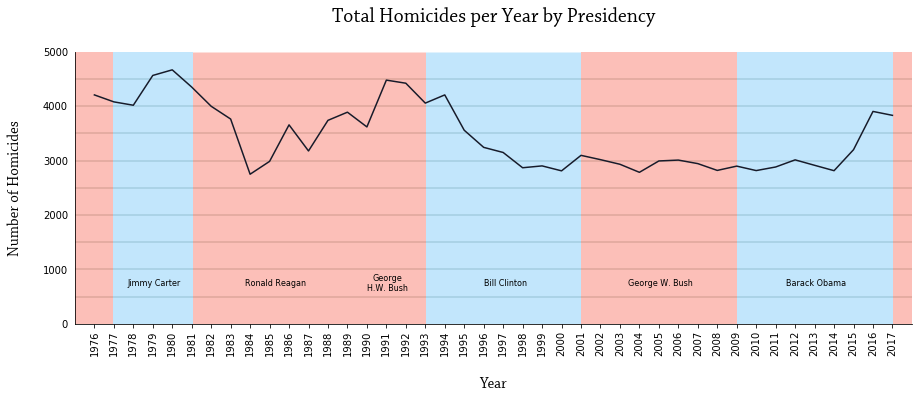

In [11]:
fig, ax = plt.subplots(figsize=(15,5))

plt.plot(midwest_total_group["Year"], midwest_total_group["ID"], color='#171B2A')

ax.set_title('Total Homicides per Year by Presidency', fontname='Chaparral Pro', loc='center', pad=30, fontsize=20)
ax.set_xlabel('Year', labelpad=20, fontname='Chaparral Pro', fontsize=15)
ax.set_ylabel('Number of Homicides', labelpad=20, fontname='Chaparral Pro', fontsize=15)
 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tick_params(
    axis='y',
    left=False)

ax.hlines(500, 1975, 2018, color='#c1cdc6')
ax.hlines(1000, 1975, 2018, color='#c1cdc6')
ax.hlines(1500, 1975, 2018, color='#c1cdc6')
ax.hlines(2000, 1975, 2018, color='#c1cdc6')
ax.hlines(2500, 1975, 2018, color='#c1cdc6')
ax.hlines(3000, 1975, 2018, color='#c1cdc6')
ax.hlines(3500, 1975, 2018, color='#c1cdc6')
ax.hlines(4000, 1975, 2018, color='#c1cdc6')
ax.hlines(4500, 1975, 2018, color='#c1cdc6')

ax.vlines(1979, 0, 5000, color='lightskyblue', linewidth=80, alpha=0.5)
ax.vlines(1987, 0, 5000, color='salmon', linewidth=233, alpha=0.5)
ax.vlines(1997, 0, 5000, color='lightskyblue', linewidth=155, alpha=0.5)
ax.vlines(2005, 0, 5000, color='salmon', linewidth=156, alpha=0.5)
ax.vlines(2013, 0, 5000, color='lightskyblue', linewidth=156, alpha=0.5)
ax.vlines(1976, 0, 5000, color='salmon', linewidth=38, alpha=0.5)
ax.vlines(2018, 0, 5000, color='salmon', linewidth=38, alpha=0.5)

plt.xlim(1975, 2018)
plt.ylim(0, 5000)

ax.text(.885, .14, "Barack Obama", size=8, ha="center", transform=ax.transAxes)
ax.text(.699, .14, "George W. Bush", size=8, ha="center", transform=ax.transAxes)
ax.text(.515, .14, "Bill Clinton", size=8, ha="center", transform=ax.transAxes)
ax.text(.3735, .12, "George\nH.W. Bush", size=8, ha="center", transform=ax.transAxes)
ax.text(.24, .14, "Ronald Reagan", size=8, ha="center", transform=ax.transAxes)
ax.text(.095, .14, "Jimmy Carter", size=8, ha="center", transform=ax.transAxes)

plt.xticks(np.arange(1976, 2018, step=1), rotation=90)

plt.savefig("images/homicides_by_prez.png", dpi=300, bbox_inches="tight", pad_inches=0.25)

plt.show()

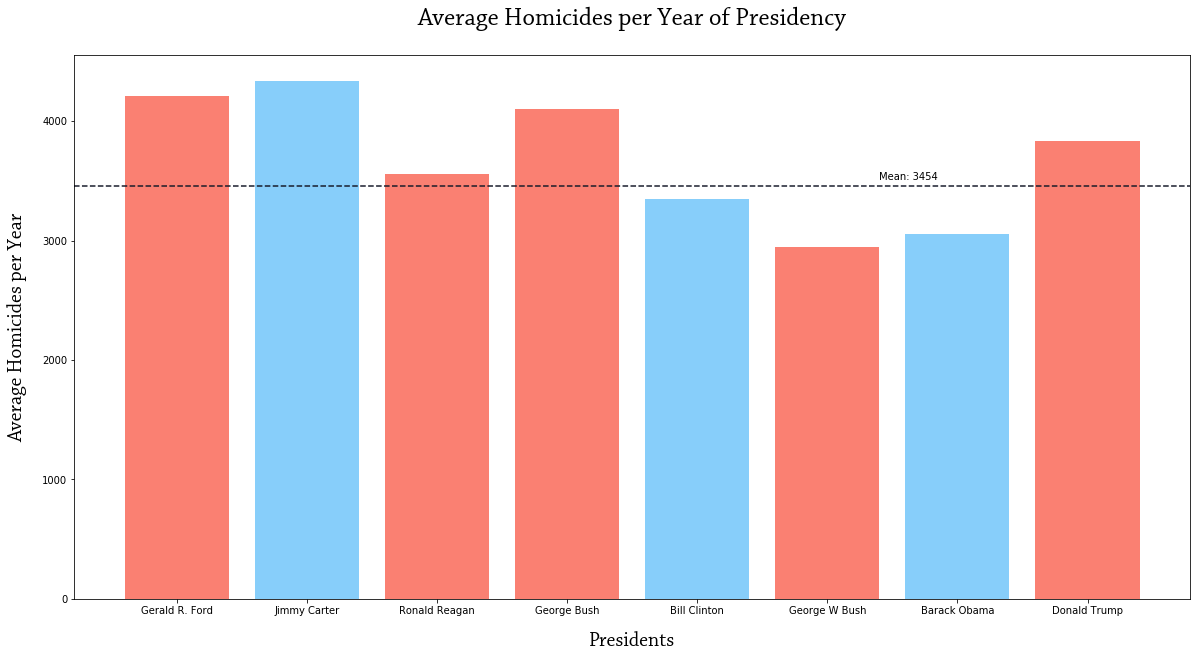

In [12]:
#calculate average per year
avg_per_year = murders_by_year_df['Total'].mean()
avg_per_year

#set x and y values
x = order_presTerms_murder_df['President']
y = order_presTerms_murder_df['Avg Murder per Year']

#create plot
plt.figure(figsize=(20,10))
plt.bar(x,y, align='center', color = ['salmon', 'lightskyblue', 'salmon', 'salmon', 'lightskyblue', 'salmon','lightskyblue', 'salmon'])
plt.axhline(avg_per_year, color = '#171b2a', linestyle = 'dashed', label = 'Mean')
#plt.axhline(median, color = '#171b2a',linestyle = 'dotted', label = 'Median')
# plt.axhline(4000, color = '#c1cdc6', alpha = .5)

plt.title("Average Homicides per Year of Presidency", fontname='Chaparral Pro', loc='center', pad=30, fontsize=25)
plt.xlabel("Presidents",fontname='Chaparral Pro', fontsize=20, labelpad = 15)
plt.ylabel("Average Homicides per Year",fontname='Chaparral Pro', fontsize=20, labelpad = 15)
#plt.text(7.85, avg_per_year, "Mean: "+ str(round(avg_per_year, 2)))
plt.text(5.4, avg_per_year + 50, "Mean: "+ str(round(avg_per_year)))

plt.savefig("images/avg_homicides_by_prez.png", dpi=300, bbox_inches="tight", pad_inches=0.25)

plt.show()

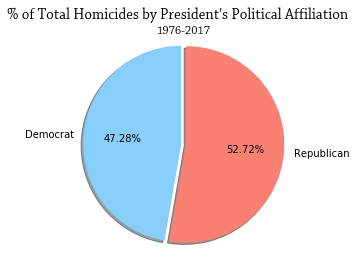

In [13]:
labels = ['Democrat', 'Republican']
color = ['lightskyblue', 'salmon']
explode = (0,.05)

# Build Pie Chart

plt.pie(mrdr_party_t_df['Total'], explode=explode, labels = labels, colors = color
        , autopct="%1.2f%%", shadow=True, startangle=90)

plt.title("1976-2017", pad = 2, fontname='Chaparral Pro', fontsize = 12)
plt.suptitle("% of Total Homicides by President's Political Affiliation", fontname='Chaparral Pro', fontsize=15)
plt.axis('equal')

plt.savefig("images/total_homicides_political.png", dpi=300, bbox_inches="tight", pad_inches=0.25)

plt.show()

In [14]:
#loading the annual murder data into populations to run Student's T-test
pop1 = pres_mby_df[pres_mby_df['Party']== 'Republican']
pop1 = pop1['Total']
pop2 = pres_mby_df[pres_mby_df['Party']== 'Democrat']
pop2 = pop2['Total']

In [15]:
#the difference is statistically insignificant
stats.ttest_ind(pop1, pop2, equal_var=False)

Ttest_indResult(statistic=0.250331516972973, pvalue=0.8036577103515166)

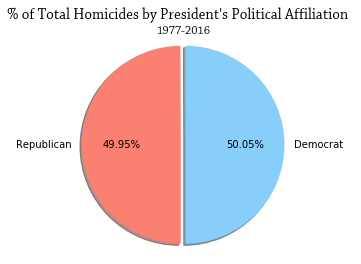

In [16]:
#If we consider the two presidents in the dataset that only have one year of data outliers and remove them
labels = ['Democrat', 'Republican']
color = ['lightskyblue', 'salmon']
explode = (0,.05)
plt.title("1977-2016", pad = 2, fontname='Chaparral Pro', fontsize=12)
plt.suptitle("% of Total Homicides by President's Political Affiliation", fontname='Chaparral Pro', fontsize=15)
# Build Pie Chart

plt.pie(r_mrdr_party_t_df['Total'], explode=explode, labels = labels, colors = color
        , autopct="%1.2f%%", shadow=True, startangle=270)

plt.axis('equal')

plt.savefig("images/total_homicides_political_new.png", dpi=300, bbox_inches="tight", pad_inches=0.25)

plt.show()